Source : https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns; sns.set()

In [79]:
pd.options.display.max_rows =10

## Simple Linear Regression

In [3]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
x,y

(array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
        1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
        3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
        2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
        4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
        8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
        8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
        1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
        9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
        6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
        9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
        1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
        2.87775339e+00, 1.30028572e+00]),
 array([ 2.65326739,  8.56128423, -5.66895863,  1.03398685, -3.18219253,
        -2.91881241, 

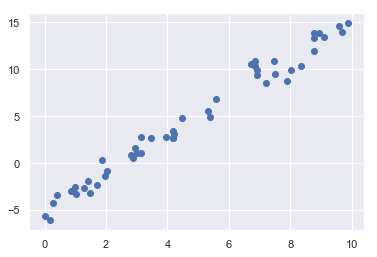

In [4]:
plt.scatter(x, y);

In [6]:
from sklearn.linear_model import LinearRegression

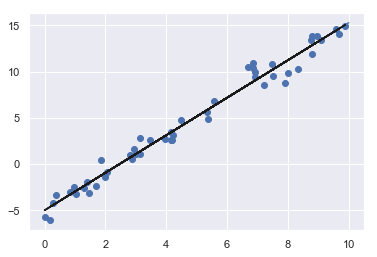

In [14]:
reg= LinearRegression(fit_intercept=True)
reg.fit(x[:,np.newaxis],y)

xfit = np.linspace(0,10,1000)
yfit = reg.predict(xfit[:,np.newaxis])

y_new = reg.predict(x[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.plot(x,y_new,color='K')

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are `coef_` and `intercept_`:

In [22]:
print(f'Coeff -> {reg.coef_} intercept -> {reg.intercept_}'.format(reg.coef_,reg.intercept_))

Coeff -> [2.02720881] intercept -> -4.998577085553202


The LinearRegression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form<br><br>
$y=a0+a1x1+a2x2+⋯$

In [23]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

In [34]:
reg.fit(X, y)
print(reg.intercept_)
print(reg.coef_)

0.5000000000000144
[ 1.5 -2.   1. ]


## Basis Function Regression
One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions.

The idea is to take our multidimensional linear model:
<br>$y=a0+a1x1+a2x2+a3x3+⋯$
<br>and build the x1,x2,x3, and so on, from our single-dimensional input x. 

<br>That is, we let $x_{n}=f_{n}(x)$
, where $f_{n}()$
 is some function that transforms our data.<br><br>

For example, if $f_{n}(x)=x_{n}$, our model becomes a polynomial regression:
$y=a0+a1x+a2x2+a3x3+⋯$

<br><br>
Notice that this is still a linear model—the linearity refers to the fact that the coefficients $a_{n}$
 never multiply or divide each other. 

### Polynomial basis functions

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
x = np.array([2,3,4])


In [46]:
pf = PolynomialFeatures(degree=3,include_bias=False)
pf.fit_transform(x[:,np.newaxis])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

the cleanest way to accomplish this is to use a pipeline. Let's make a 7th-degree polynomial model in this way:

In [47]:
from sklearn.pipeline import make_pipeline

In [52]:
poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())

In [53]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
x,y

(array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
        1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
        3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
        2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
        4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
        8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
        8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
        1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
        9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
        6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
        9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
        1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
        2.87775339e+00, 1.30028572e+00]),
 array([-0.92530881,  0.71111718, -0.06598087,  0.11672496,  0.88294471,
         0.8210899 , 

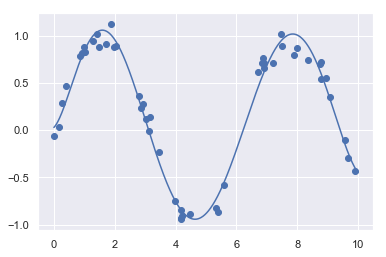

In [61]:
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit)


### Gaussian basis functions

[Basics of Basis function](http://www.psych.mcgill.ca/misc/fda/ex-basis-a1.html)

![title](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.06-gaussian-basis.png)

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

In [67]:
gauss_model = make_pipeline(GaussianFeatures(20),LinearRegression())
gauss_model.fit(x[:,np.newaxis],y)

Pipeline(memory=None,
     steps=[('gaussianfeatures', GaussianFeatures(N=20, width_factor=2.0)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [68]:
yfit = gauss_model.predict(xfit[:, np.newaxis])

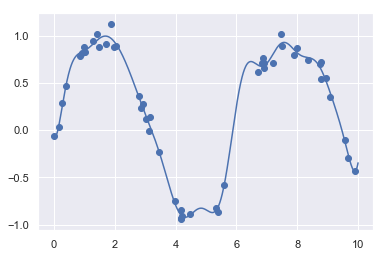

In [72]:
plt.scatter(x,y)
plt.plot(xfit,yfit)

## Regularization

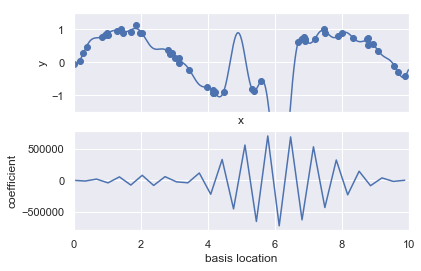

In [73]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)


### Ridge regression (L2 Regularization)
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be

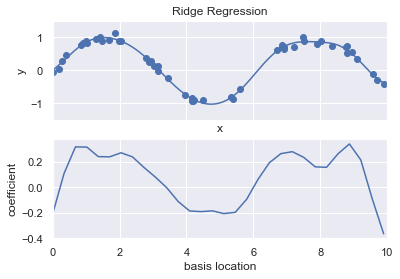

In [75]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

### Lasso regression (L1 regularization)
Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:

# Hyperparameters and Model Validation

## Model validation the wrong way

In [76]:
from sklearn.datasets import load_iris

In [77]:
iris = load_iris()
x = iris.data
y=iris.target

In [80]:
x,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [88]:
model.fit(x,y)
y_model = model.predict(x)

In [85]:
from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(y,y_model)

1.0

We see an accuracy score of 1.0, which indicates that 100% of points were correctly labeled by our model! But is this truly measuring the expected accuracy? Have we really come upon a model that we expect to be correct 100% of the time?

<br><br>As you may have gathered, the answer is no. In fact, this approach contains a fundamental flaw: it trains and evaluates the model on the same data. Furthermore, the nearest neighbor model is an instance-based estimator that simply stores the training data, and predicts labels by comparing new data to these stored points: except in contrived cases, it will get 100% accuracy every time!

### Model validation the right way: Holdout sets